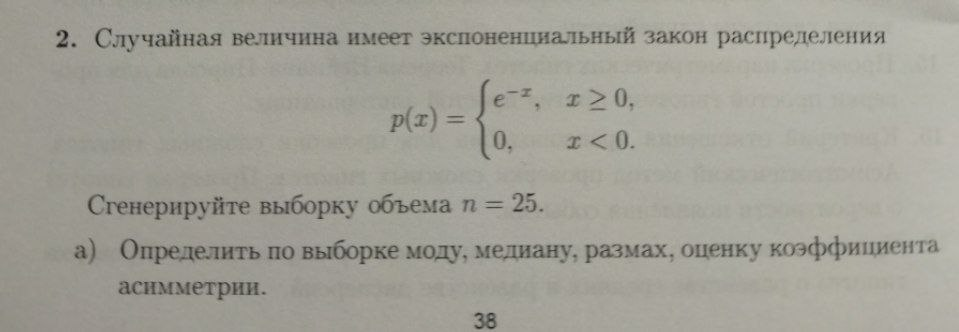

In [500]:
from IPython.display import Image
Image("images/photo_5350278556795665960_y.jpg")

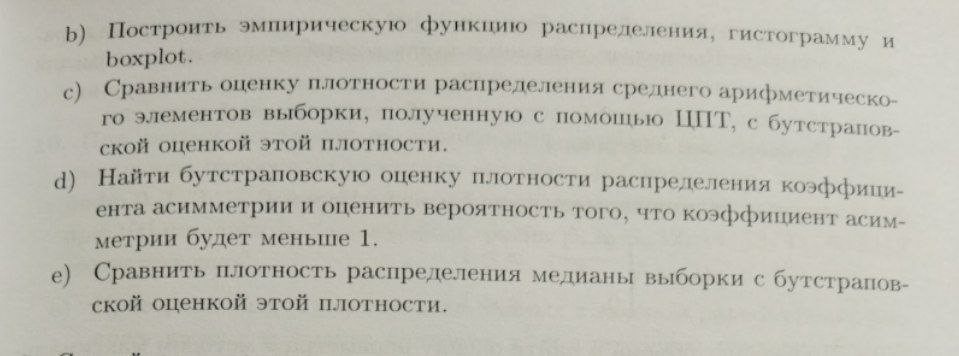

In [501]:
Image("images/photo_5350494331657645186_y.jpg")

In [502]:
import numpy as np
import random

def p(x):
    if x < 0:
        return 0
    else:
        return float(np.exp(-x))
    
def F(x):
    if x < 0:
        return 0
    else:
        return float(1 - np.exp(-x))
    
def F_reversed(y):
    if y < 0:
        return 0
    else:
        return float(np.log(1 - y) * (-1))

# здесь можно поменять размер генерируемой выборки
n = 25
sample = [0.] * n
for i in range(n):
    sample[i] = F_reversed(random.random())


In [503]:
# a)
var_series = sorted(sample)
l = var_series[-1] - var_series[0]
mediana = var_series[n//2+1] if n % 2 == 1 else (var_series[k] + var_series[k-1])/2
counter = [var_series.count(var_series[i]) for i in range(n)]
moda = []
for i in range(n):
    if counter[i] == max(counter):
        moda.append(var_series[i])

def M_k(var_series, k):
    arr = np.array(var_series)
    return np.sum((arr - arr.mean())**k)/arr.size

assym = M_k(var_series, 3) / (M_k(var_series, 2) ** (1.5))
print("Мода: ", moda, "\nМедиана: ", mediana, "\nРазмах: ", l, "\nОценка коэффициента ассиметрии: ", assym)
print(M_k(var_series, 1))
print(M_k(var_series, 2))


Мода:  [0.07147849743588636, 0.0991356135623226, 0.10193054867058138, 0.2298074906992089, 0.2639833389278295, 0.28060682908970314, 0.3279861184804067, 0.3825607058122309, 0.42436081055092745, 0.45475775424227155, 0.4957895014645339, 0.5236352752166914, 0.7069600269045103, 0.7787927521230663, 0.783793988567174, 0.8972974628093497, 0.9558127802387351, 1.0650745573103004, 1.2529446476894237, 1.4571114445164273, 1.7180234026647232, 1.723891152908953, 2.2173329419033934, 2.647136391492888, 2.671945184267077] 
Медиана:  0.7787927521230663 
Размах:  2.600466686831191 
Оценка коэффициента ассиметрии:  1.052063038751075
3.552713678800501e-17
0.5733142485618232


Text(0.5, 1.0, 'Histogram')

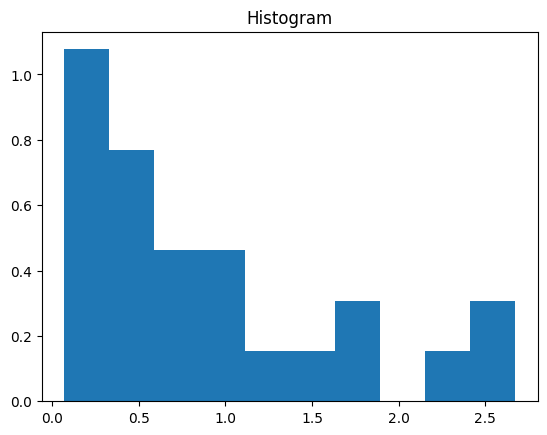

In [504]:
# b)
import matplotlib.pyplot as plt
plt.hist(var_series, 10, density=True)
plt.title("Histogram")

Text(0.5, 1.0, 'Distribution function')

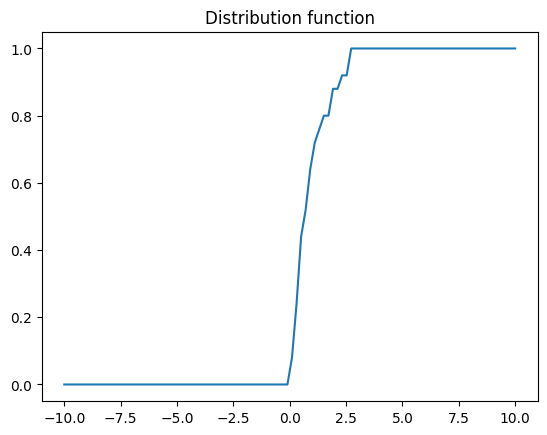

In [505]:
np_var_series = np.array(var_series)
distribution_right_bins = np.linspace(-10, 10, 100)
distribution = ( np_var_series.reshape(-1, 1) < distribution_right_bins.reshape(1, -1) ).mean(0)
plt.plot(distribution_right_bins, distribution)
plt.title("Distribution function")

Text(0.5, 1.0, 'Distribution function 2.0 beautified')

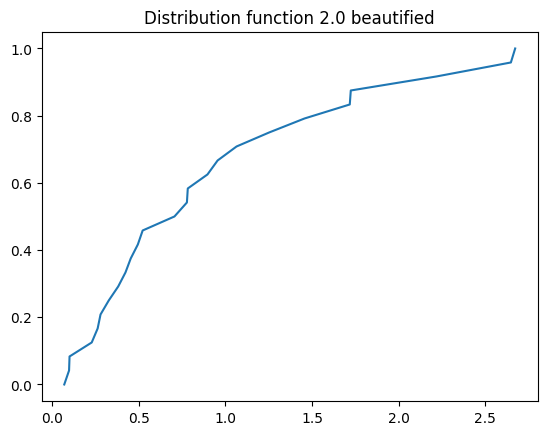

In [506]:
plt.plot(var_series, np.linspace(0, 1, len(var_series)))
plt.title("Distribution function 2.0 beautified")

Text(0.5, 1.0, 'Boxplot')

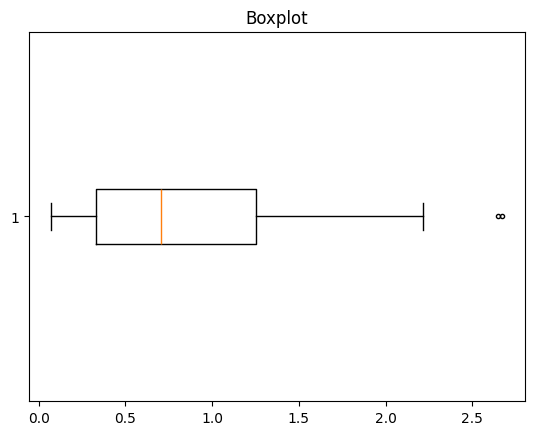

In [507]:
plt.boxplot(np_var_series, vert=False, sym='.')
plt.title("Boxplot")

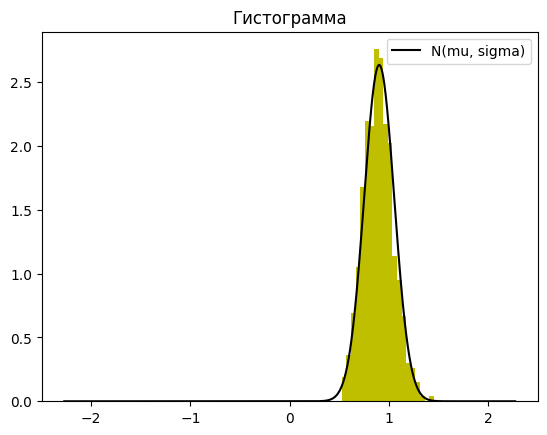

In [ ]:
# c)
from scipy.stats import norm

size = 1000
bootstrap_mean = []
for _ in range(size):
    bootstrap_mean.append(np.mean(np.random.choice(var_series, n, replace=True)))

mu = M_k(var_series, 1)
sigma = M_k(var_series, 2) ** 0.5
x = np.linspace(mu - sigma*3, mu + sigma*3, 1000)
y = norm.pdf(x, np.mean(var_series), sigma/(n**0.5))
plt.hist(bootstrap_mean, 20, color='y', density=True)
plt.plot(x, y, label='N(mu, sigma)', color="black")
plt.title('Гистограмма')
plt.legend()

Вероятность того, что коэффициент асимметрии будет меньше 1 ≈ 0.368


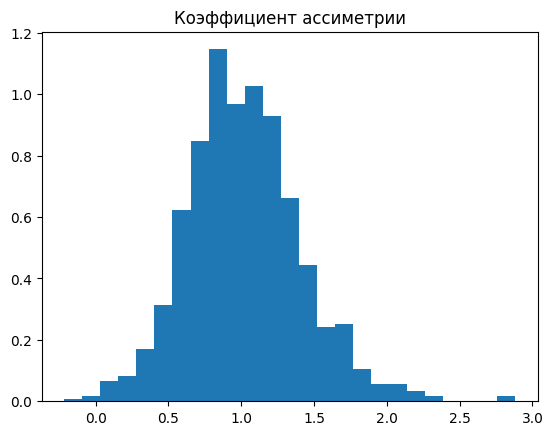

In [548]:
# d)
bootstrap_asymmetry = []
for i in range(size):
    boot_sample = [np.random.choice(var_series, n, replace=True)]
    bootstrap_asymmetry.append(M_k(boot_sample, 3) / (M_k(boot_sample, 2) ** 1.5))

plt.hist(bootstrap_asymmetry, 25, density=True)
plt.title('Коэффициент ассиметрии')
ans = 0.
for x in bootstrap_asymmetry:
    if x < 1:
        ans += x
print("Вероятность того, что коэффициент асимметрии будет меньше 1 ≈", round(ans / size, 3))

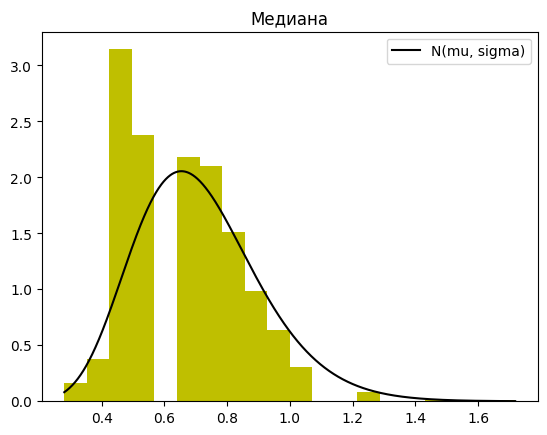

In [557]:
# e)
from math import comb

bootstrap_median = []
for i in range(size):
    bootstrap_median.append(np.median(np.random.choice(var_series, n, replace=True)))

x = np.linspace(min(bootstrap_median), max(bootstrap_median), size)
y = []
k = n // 2 + 1
for i in x:
    y.append(((1-F(i))**(n-k)) * (F(i)**(k-1)) * n * p(i) * comb(n-1, k-1))
plt.hist(bootstrap_median, 20, color='y', density=True)
plt.plot(x, y, label='N(mu, sigma)', color = 'black')
plt.title('Медиана')
plt.legend()